In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [12]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gapminder.csv')
# One hot encode the categorical variables
df = pd.get_dummies(df,drop_first=True)
# Create arrays for features and target variable
y = df['life_expectancy'].values
X = df.drop('life_expectancy',axis=1).values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (14740,)
Dimensions of X before reshaping: (14740, 190)


In [13]:
# Reshape X and y
y = y.reshape(-1,1)
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (14740, 1)
Dimensions of X after reshaping: (14740, 190)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [25]:
reg = LinearRegression()
reg.fit(X_train,y_train)

cv_results = cross_val_score(reg,X_train,y_train,
                             cv=10,scoring='neg_mean_squared_error')

mse_cv = np.mean(np.sqrt(-1*cv_results))
mse_sd_cv = np.std(np.sqrt(-1*cv_results))
print('10-CV RMSE (mean +/- sd) : %.4f +/- %.4f' %(mse_cv,mse_sd_cv))
print("RMSE test: ",np.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('Rquared train: ',reg.score(X_train,y_train))
print('Rquared test: ',reg.score(X_test,y_test))

10-CV RMSE (mean +/- sd) : 3.2966 +/- 0.1460
RMSE test:  3.4075634670491834
Rquared train:  0.9583263405028531
Rquared test:  0.954059596141294


## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso, LassoCV

In [44]:
lasso_cv = LassoCV(alphas=[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3],
                   normalize=True)
lasso_cv.fit(X_train,y_train)

/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[0.0003, 0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [45]:
lasso_cv.alpha_

0.0001

In [46]:
lasso = Lasso(alpha=0.0001,normalize=True)
lasso.fit(X_train,y_train)

cv_results = cross_val_score(lasso,X_train,y_train,
                             cv=10,scoring='neg_mean_squared_error')

mse_cv = np.mean(np.sqrt(-1*cv_results))
mse_sd_cv = np.std(np.sqrt(-1*cv_results))
print('10-CV RMSE (mean +/- sd) : %.4f +/- %.4f' %(mse_cv,mse_sd_cv))
print("RMSE test: ",np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))))
print('Rquared train: ',lasso.score(X_train,y_train))
print('Rquared test: ',lasso.score(X_test,y_test))

10-CV RMSE (mean +/- sd) : 3.2977 +/- 0.1482
RMSE test:  3.404079473563604
Rquared train:  0.9582219487618353
Rquared test:  0.9541534897672183


In [51]:
df_columns = df.drop('life_expectancy',axis=1).columns

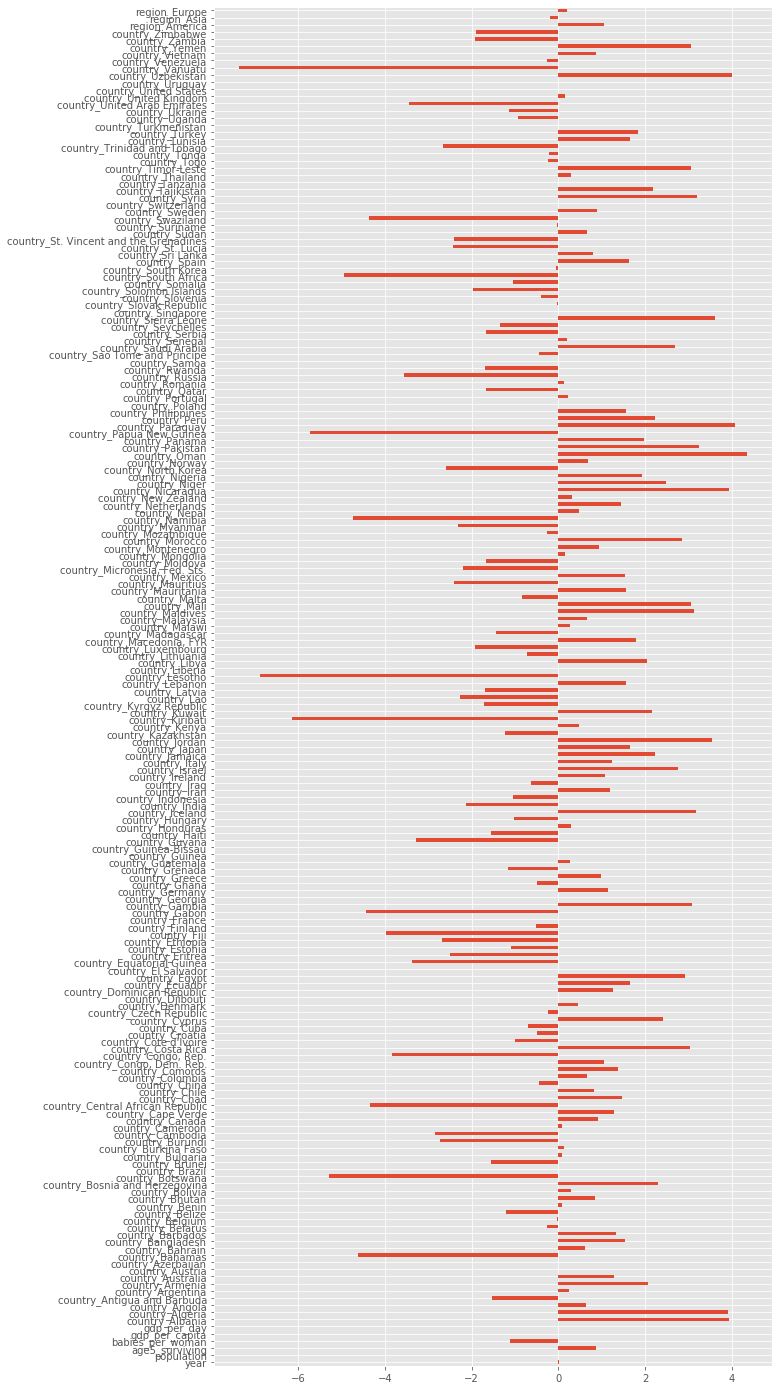

In [57]:
pd.Series(lasso.coef_,index=df_columns).plot.barh(figsize=(10,25))